In [1]:
# Imports
import warnings
from plotnine import *
from plotnine.data import mtcars

warnings.filterwarnings("ignore")


In [2]:
# Data

mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
mtcars['carb'].unique()

array([4, 1, 2, 3, 6, 8])

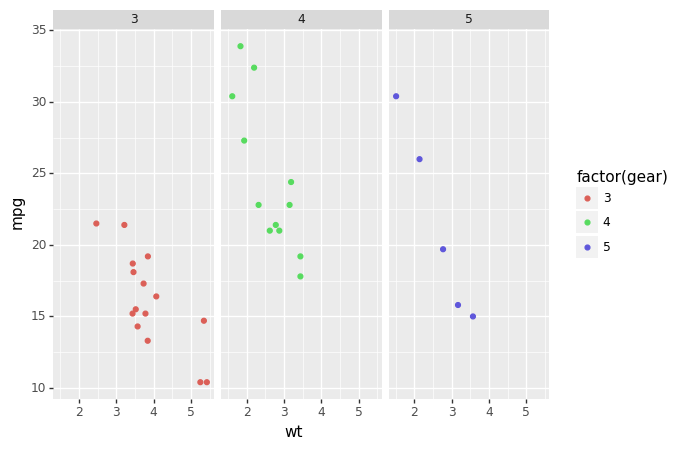

<ggplot: (370417128)>

In [4]:
# First Plot

(ggplot(data=mtcars)
 + geom_point(aes("wt", "mpg", color="factor(gear)"))
 + facet_wrap("~gear"))

## Aesthetics

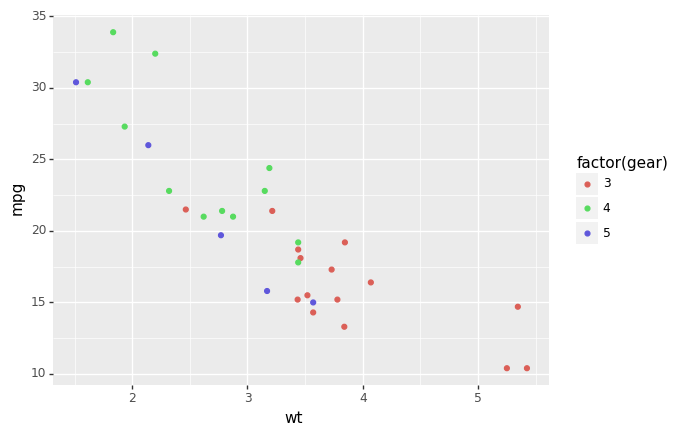

<ggplot: (370633379)>

In [5]:
# Color by Gears 

(ggplot(data=mtcars)
 + geom_point(aes("wt", "mpg", color="factor(gear)"))
)

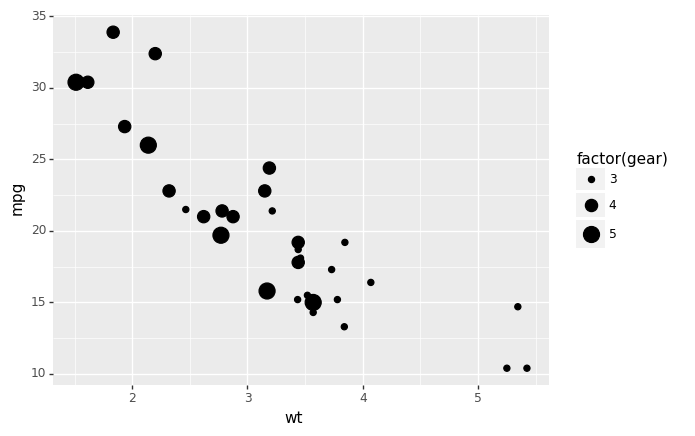

<ggplot: (370752362)>

In [6]:
# Size by Gears 

(ggplot(data=mtcars)
 + geom_point(aes("wt", "mpg", size="factor(gear)"))
)

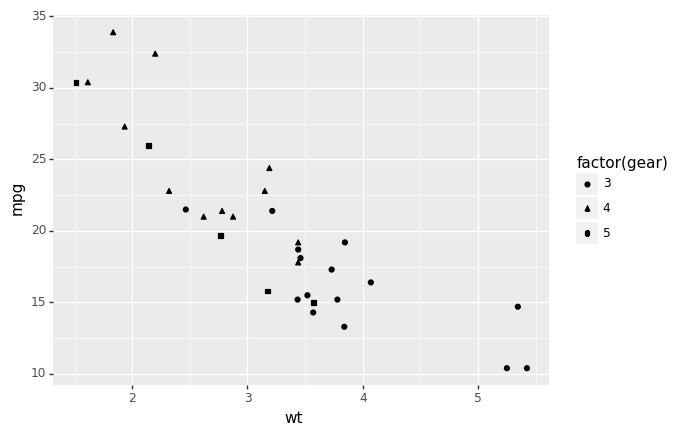

<ggplot: (370800460)>

In [7]:
# Plotting different Shape for Different gears

(ggplot(data=mtcars)
 + geom_point(aes("wt", "mpg", shape="factor(gear)"))
)


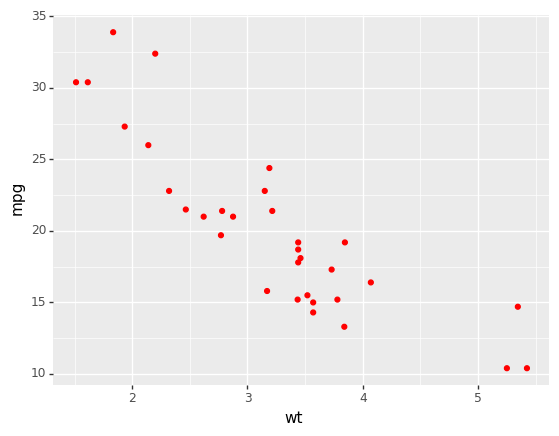

<ggplot: (370917015)>

In [8]:
# Same Color

(ggplot(data=mtcars)
+ geom_point(aes("wt", "mpg"), color='red')
)


## Facets

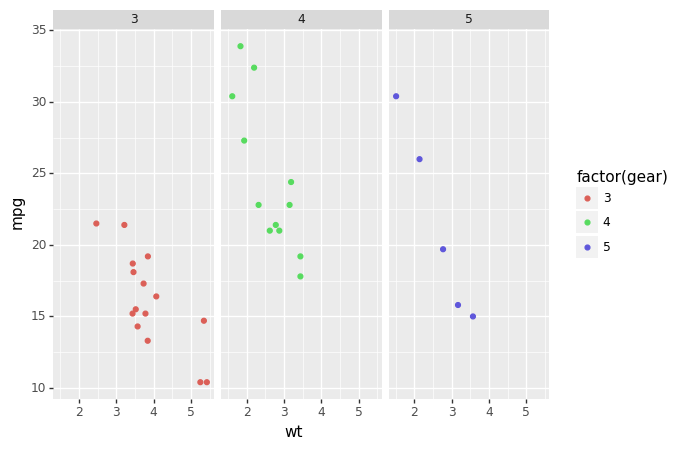

<ggplot: (275165028)>

In [9]:
# Faceting by gear

(ggplot(data=mtcars)
 + geom_point(aes("wt", "mpg", color="factor(gear)"))
 + facet_wrap("gear")
)

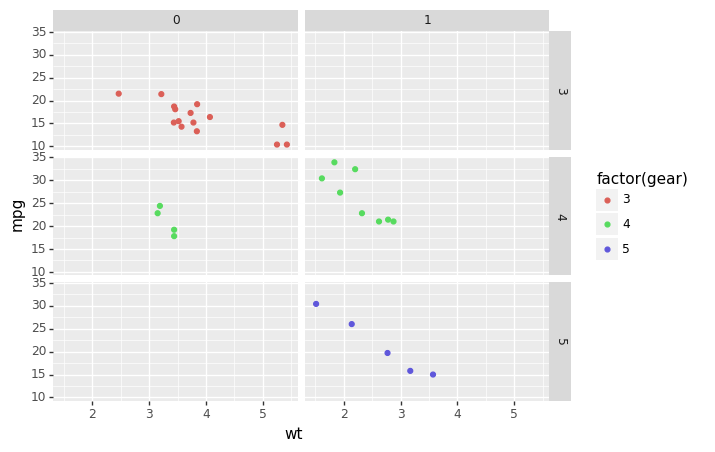

<ggplot: (371070817)>

In [10]:
# Faceting by gear and am

(ggplot(data=mtcars)
 + geom_point(aes("wt", "mpg", color="factor(gear)"))
 + facet_grid("gear~am")
)

## Themes

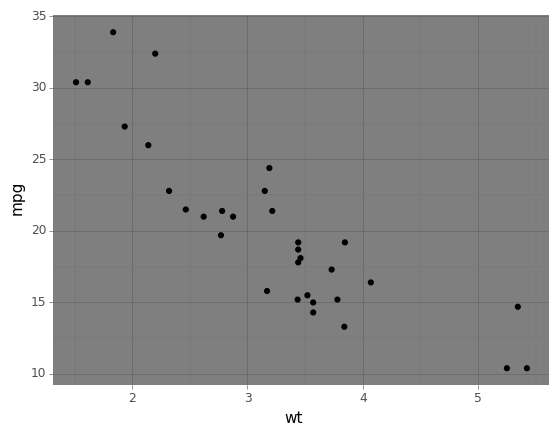

<ggplot: (371073518)>

In [11]:
(ggplot(data=mtcars)
 + geom_point(aes("wt", "mpg"))
 + theme_dark()
)

## Geometric Objects

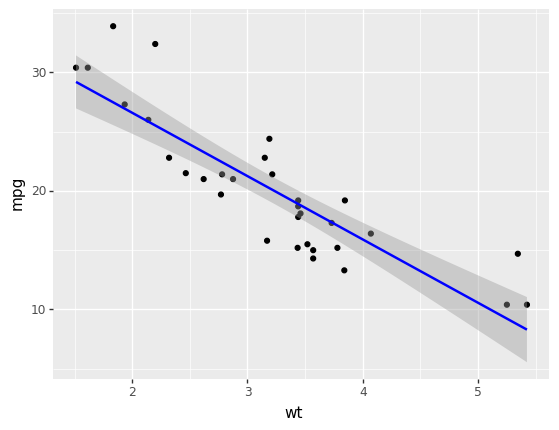

<ggplot: (370752278)>

In [12]:
(ggplot(data=mtcars)
 + geom_point(aes("wt", "mpg"))
 + geom_smooth(aes("wt", "mpg"), color="blue", method='lm')
)

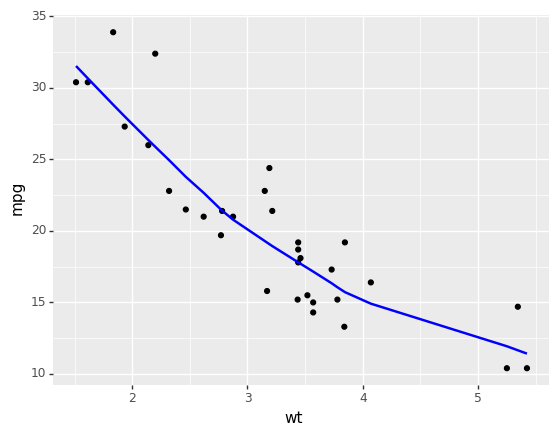

<ggplot: (370738785)>

In [13]:
(ggplot(data=mtcars)
 + geom_point(aes("wt", "mpg"))
 + geom_smooth(aes("wt", "mpg"), color="blue", method='lowess')
)

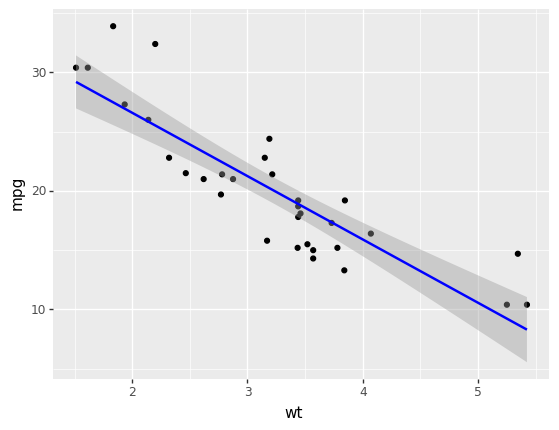

<ggplot: (370758126)>

In [14]:
(ggplot(data=mtcars, mapping=aes(x="wt", y="mpg"))
 + geom_point()
 + geom_smooth(color="blue", method="lm")
)

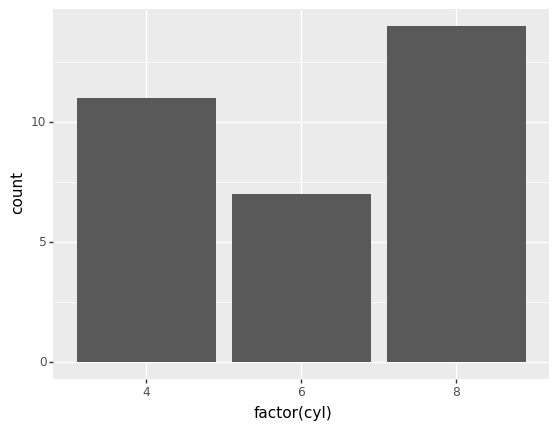

<ggplot: (371390046)>

In [15]:
cars_cnt_by_cyl = mtcars.groupby('cyl').agg(count = ('name', 'count')).reset_index()

(ggplot(data=cars_cnt_by_cyl) 
 + geom_bar(aes(x="factor(cyl)", y="count"), stat="identity")
)

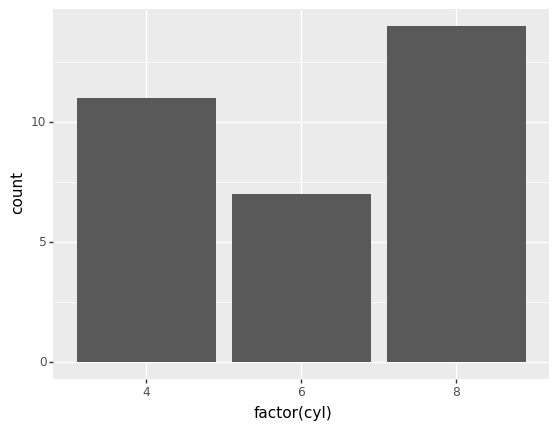

<ggplot: (371418375)>

In [16]:
(ggplot(data=mtcars) 
 + stat_count(aes(x="factor(cyl)"))
)

## Labels

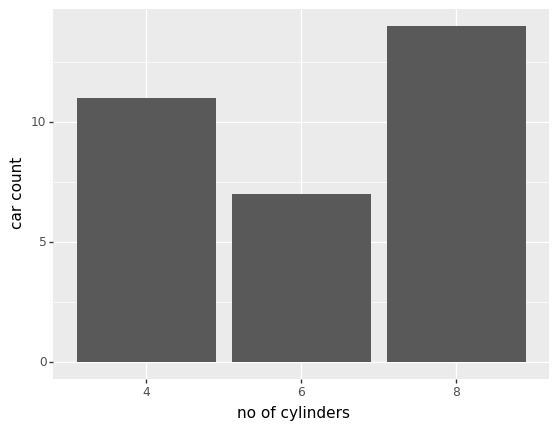

<ggplot: (371451344)>

In [17]:
(ggplot(data=cars_cnt_by_cyl) 
 + geom_bar(aes(x="factor(cyl)", y="count"), stat="identity")
 + labs(x='no of cylinders', y='car count')
)

## Annotations

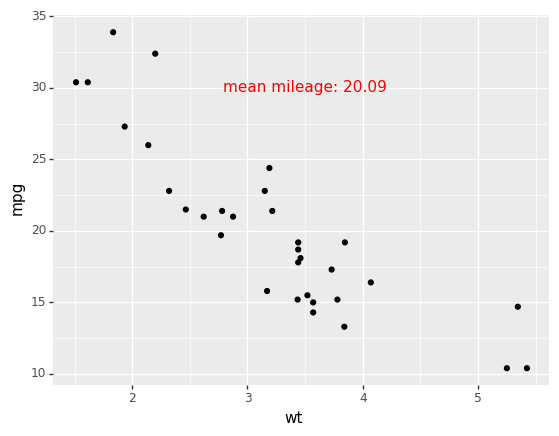

<ggplot: (371317065)>

In [18]:
mean = round(mtcars['mpg'].mean(), 2)
(ggplot(mtcars, aes(x="wt", y="mpg"))
 + geom_point()
 + annotate("text", x=3.5, y=30, label=f'mean mileage: {mean}', color='red')
)

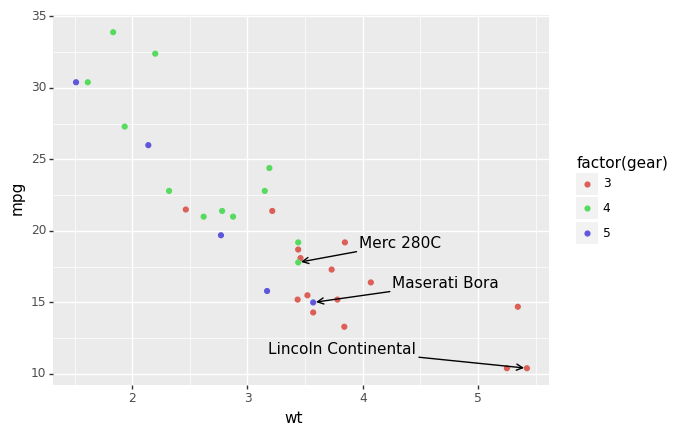

<ggplot: (371522317)>

In [19]:
from adjustText import adjust_text
best_mpg_by_gear = (mtcars
                    .sort_values('mpg', ascending=True)
                    .groupby('gear')
                    .first()
                    )
(ggplot(mtcars, aes(x="wt", y="mpg"))
 + geom_point(aes(color="factor(gear)"))
 + geom_text(aes(label="name"), data=best_mpg_by_gear, adjust_text={'expand_points': (2.5, 2.5), "arrowprops":dict(arrowstyle='->', color='black')})
)

## Coordinates

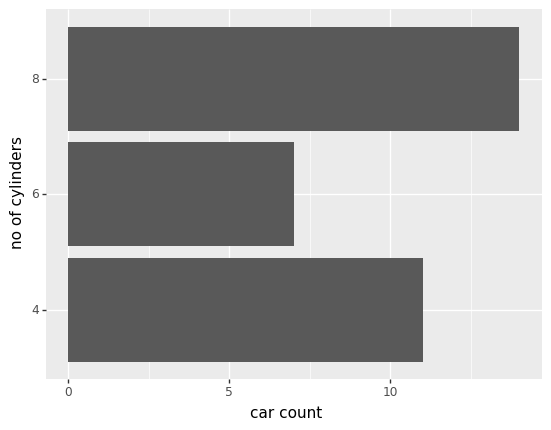

<ggplot: (371587837)>

In [20]:
(ggplot(data=cars_cnt_by_cyl) 
 + geom_bar(aes(x="factor(cyl)", y="count"), stat="identity")
 + labs(x='no of cylinders', y='car count')
 + coord_flip()
)

## Adjusting Scales

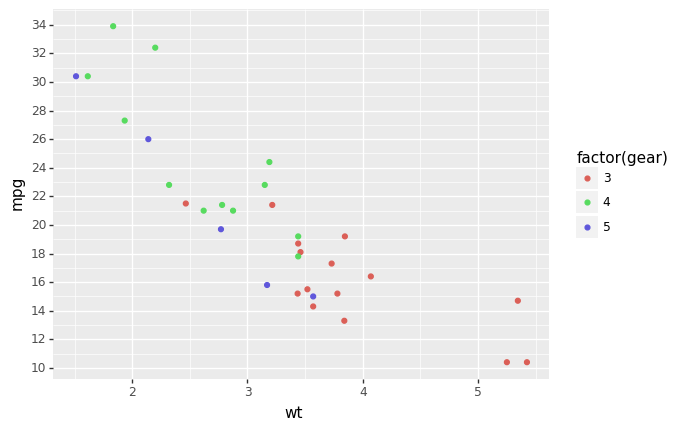

<ggplot: (371615254)>

In [21]:
(ggplot(mtcars, aes(x="wt", y="mpg"))
 + geom_point(aes(color='factor(gear)'))
 + scale_y_continuous(breaks=range(10,36,2))
)

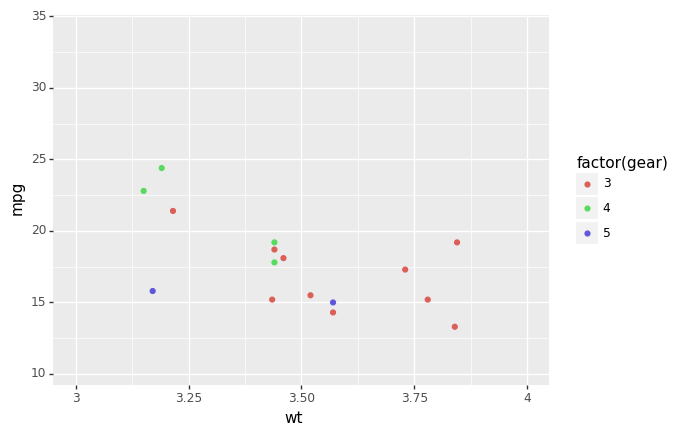

<ggplot: (371663159)>

In [22]:
(ggplot(mtcars, aes(x="wt", y="mpg"))
 + geom_point(aes(color='factor(gear)'))
 + xlim(3,4)
)

In [23]:
density_plot = (ggplot(mtcars, aes(x="mpg"))
                + geom_density(color="red")
               )
density_plot.save('mpg_density.png')

## One final Plot

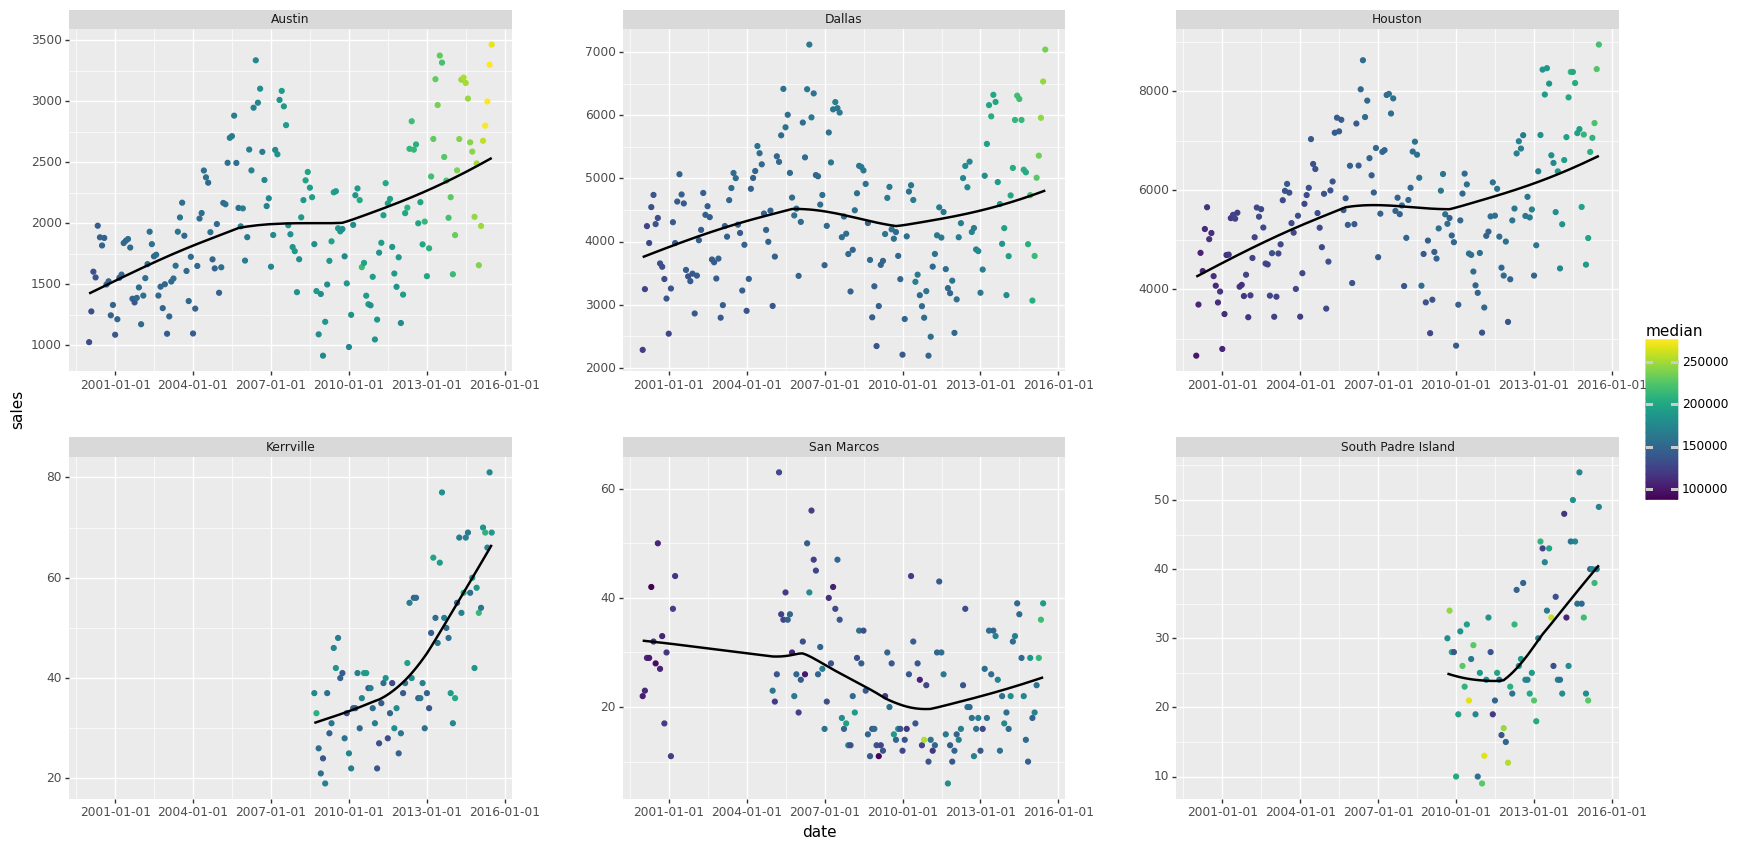

<ggplot: (372813213)>

In [24]:
import pandas as pd
from mizani.breaks import date_breaks
from plotnine.data import txhousing

# Modifying Existing Date column 
txhousing['date'] = pd.to_datetime(txhousing[['year', 'month']].assign(day=1), format='%Y-%m-%d')

# Get Total Sales for Every City and Fetch Top 3 and Bottom 3
sales_by_cities = (txhousing
                    .groupby('city')
                    .agg(sales=('sales', 'sum'))
                    .sort_values('sales', ascending=False)
                    .reset_index()
                  )
cities = list(sales_by_cities.head(3)['city']) + list(sales_by_cities.tail(3)['city'])
sample_data = txhousing[(txhousing['city'].isin(cities))]

# Create a plot
(
    ggplot(sample_data, aes(x="date", y="sales"))
    + geom_point(aes(color='median'))
    + geom_smooth(method='lowess')
    + scale_x_datetime(breaks=date_breaks("3 years"))    
    + facet_wrap('city', scales="free", ncol=3)
    + scale_color_continuous()
    + theme(figure_size=(20, 10), subplots_adjust={'wspace': 0.25, 'hspace': 0.25})
)
